<a href="https://colab.research.google.com/github/siddu017/hotel_cancel_da/blob/main/hotel_booking_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOTEL BOOKING


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/hotel_bookings 2.csv')

In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
36560,Resort Hotel,0,11,2017,May,20,18,2,4,2,...,No Deposit,241.0,NaN,0,Transient,72.67,0,1,Check-Out,24/5/2017
36561,Resort Hotel,0,107,2017,May,20,20,2,2,2,...,No Deposit,410.0,NaN,0,Transient,47.50,0,1,Check-Out,24/5/2017
36562,Resort Hotel,0,168,2017,May,20,15,3,6,2,...,No Deposit,163.0,NaN,0,Transient,84.45,0,0,Check-Out,24/5/2017
36563,Resort Hotel,0,1,2017,May,21,23,0,1,2,...,No Deposit,250.0,NaN,0,Transient,97.00,1,1,Check-Out,24/5/2017
36564,Resort Hotel,0,255,2017,May,20,17,2,5,2,...,No Deposit,240.0,NaN,0,Transient,83.00,0,1,NaN,NaN


In [ ]:
df.shape

(36565, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36565 entries, 0 to 36564
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           36565 non-null  object 
 1   is_canceled                     36565 non-null  int64  
 2   lead_time                       36565 non-null  int64  
 3   arrival_date_year               36565 non-null  int64  
 4   arrival_date_month              36565 non-null  object 
 5   arrival_date_week_number        36565 non-null  int64  
 6   arrival_date_day_of_month       36565 non-null  int64  
 7   stays_in_weekend_nights         36565 non-null  int64  
 8   stays_in_week_nights            36565 non-null  int64  
 9   adults                          36565 non-null  int64  
 10  children                        36565 non-null  int64  
 11  babies                          36565 non-null  int64  
 12  meal                            

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36565 entries, 0 to 36564
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           36565 non-null  object        
 1   is_canceled                     36565 non-null  int64         
 2   lead_time                       36565 non-null  int64         
 3   arrival_date_year               36565 non-null  int64         
 4   arrival_date_month              36565 non-null  object        
 5   arrival_date_week_number        36565 non-null  int64         
 6   arrival_date_day_of_month       36565 non-null  int64         
 7   stays_in_weekend_nights         36565 non-null  int64         
 8   stays_in_week_nights            36565 non-null  int64         
 9   adults                          36565 non-null  int64         
 10  children                        36565 non-null  int64         
 11  ba

In [ ]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,36565,36565,36565,36101,36565,36565,36565,36565,36565,36565,36564
unique,1,12,5,121,6,4,10,11,3,4,3
top,Resort Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,36565,3845,27470,16739,15925,26164,21783,15687,34705,27545,25443


In [ ]:
for col in df.describe(include = 'object').columns:
  print(col)
  print(df[col].unique())
  print('-'*75)

hotel
['Resort Hotel']
---------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
---------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
---------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' '

In [21]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [20]:
df.drop(['company','agent'], axis=1,inplace=True)
df.dropna(inplace = True)

In [25]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,36097.000000,36097.000000,36097.000000,36097.000000,36097.000000,36097.000000,36097.000000,36097.000000,36097.000000,36097.000000,36097.000000,36097.000000,36097.000000,36097.000000,36097.000000,36097.000000,36097.000000,36097.000000
mean,0.306784,90.679973,2016.038978,27.099925,15.738067,1.174253,3.090340,1.861900,0.121949,0.013242,0.048342,0.111782,0.142477,0.279442,0.579660,89.552682,0.131950,0.584758
std,0.461166,96.333572,0.701090,14.562768,8.864940,1.140991,2.445587,0.719969,0.435856,0.115756,0.214491,1.405686,0.977929,0.713276,7.788545,57.582315,0.344767,0.789779
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,10.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.720000,0.000000,0.000000
50%,0.000000,55.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
75%,1.000000,150.000000,2017.000000,39.000000,23.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,185.000000,392.000000,8.000000,5.000000


<Axes: >

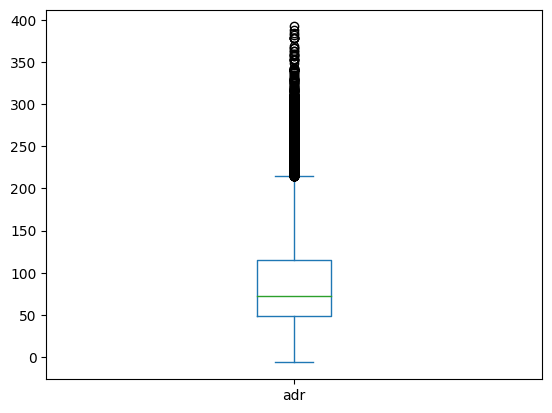

In [26]:
df['adr'].plot(kind= 'box')

In [24]:
df= df[df['adr']<400]

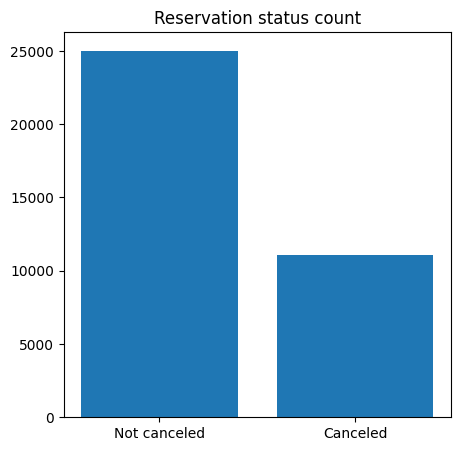

In [39]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
cancelled_perc
plt.figure(figsize= (5,5))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts())
plt.show()

NameError: ignored

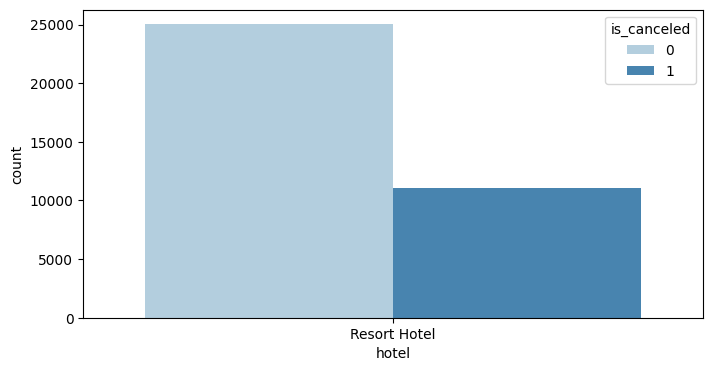

In [44]:
plt.figure(figsize = (8,4))
ax1= sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'Blues')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor(1,1))
plt.title('Reservation status in different hotels', size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['canceled','Not canceled'])
plt.show()

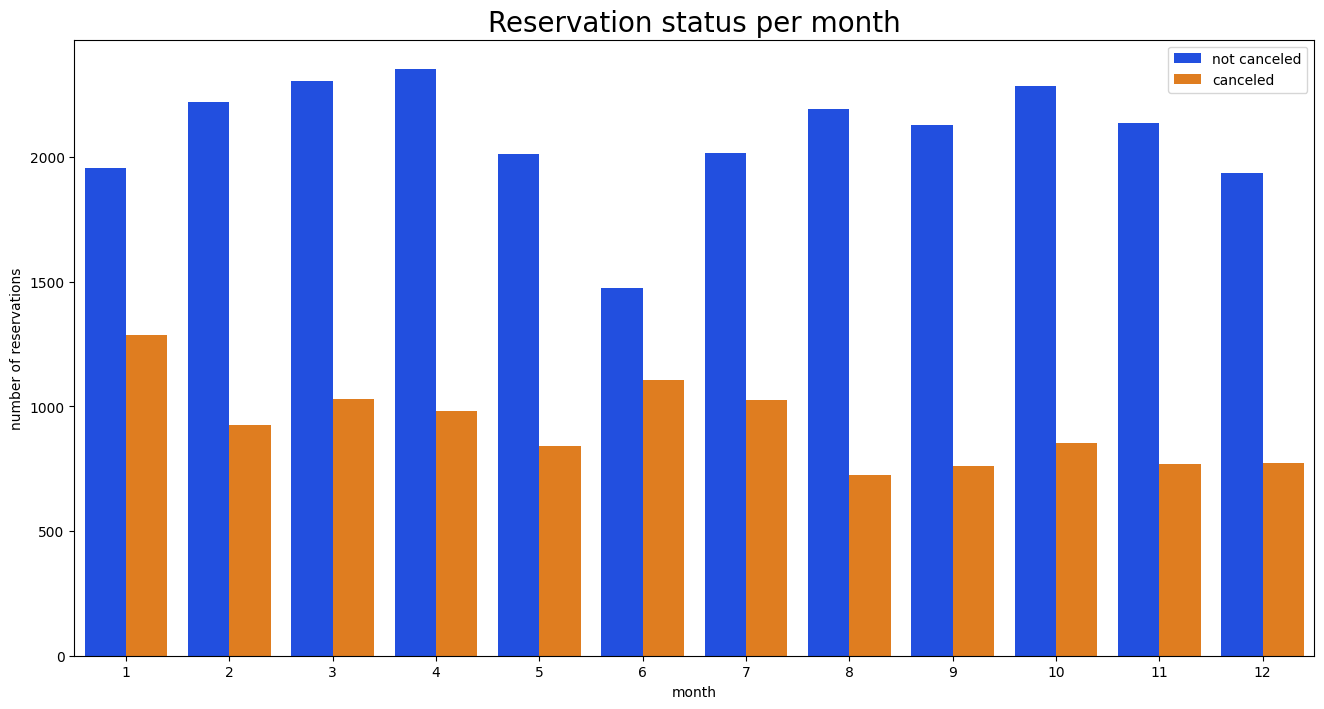

In [45]:
df['month'] = df['reservation_status_date'].dt.month

plt.figure(figsize = (16,8))

ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'bright')

legend_labels,_ = ax1. get_legend_handles_labels()

ax1.legend(bbox_to_anchor=(1,1))

plt.title('Reservation status per month', size = 20)

plt.xlabel('month')

plt.ylabel('number of reservations')

plt.legend(['not canceled', 'canceled'])

plt.show()

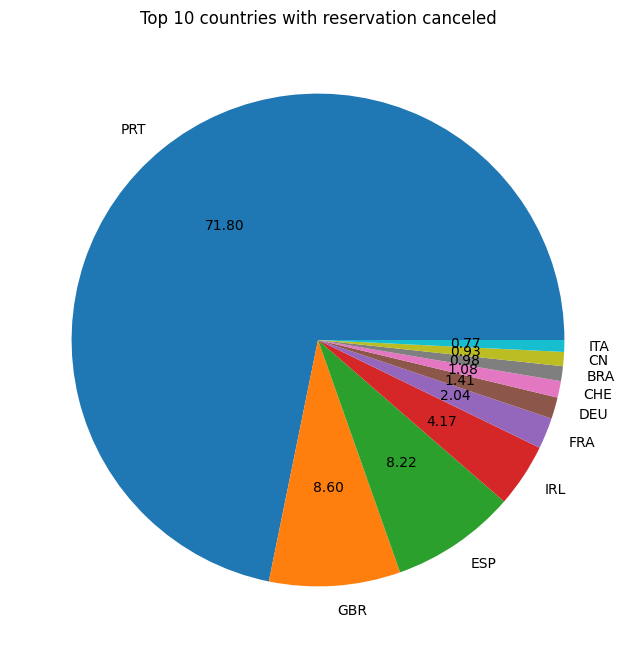

In [51]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))

plt.title('Top 10 countries with reservation canceled')

plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()